In [199]:


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pickle
import joblib
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



In [200]:
x,y=[],[]

with open('Data/SMSSpamcollection.txt','r') as file:
    data=file.read()
    for data_item in data.split('\n'):
        if len(data_item.split('\t'))==2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])
print("Successfully read the data from text file and splitted into X and Y")

Successfully read the data from text file and splitted into X and Y


In [201]:
len(x),len(y)


(5574, 5574)

In [202]:
data_dict={'mail_message':x,'label':y}
df=pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [204]:
import warnings
warnings.filterwarnings('ignore')

In [205]:


for i in range(0,len(df)):



    mesage=re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    mesage=mesage.lower()
    df['mail_message'][i]=mesage
df.head()

,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham


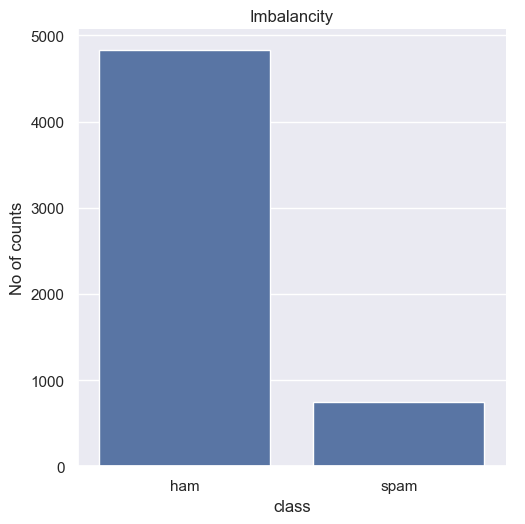

In [206]:
classs=list(df['label'].value_counts().index)
valu=list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Imbalancity')
plt.xlabel('class')
plt.ylabel("No of counts")
plt.show()

In [207]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [208]:
df.sample(2000)

,mail_message,label
4405,sorry i ll call later lt gt mins,ham
2883,hi harish s rent has been transfred to ur acnt,ham
3047,so how s the weather over there,ham
1263,hungry gay guys feeling hungry and up it no...,spam
1044,mmm thats better now i got a roast down me i ...,ham
...,...,...
3193,is ur paper today in e morn or aft,ham
1901,and miss vday the parachute and double coins ...,ham
88,i m really not up to it still tonight babe,ham
4649,we are okay going to sleep now later,ham


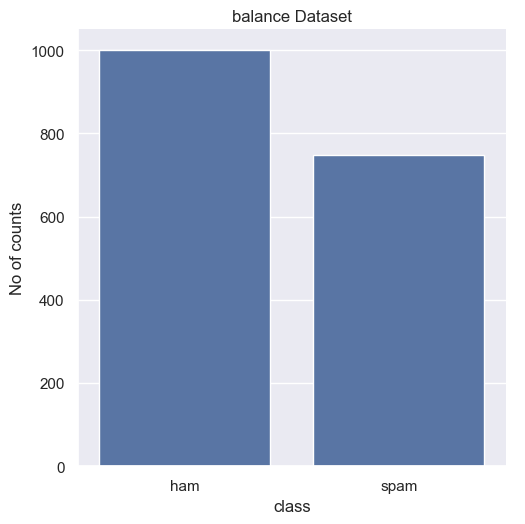

In [209]:
ham=df[df['label']=='ham'].sample(1000)  #filtering the dataset

spam=df[df['label']=='spam']
balance_df=pd.concat([ham,spam]) #combining of the spam and ham

classs=list(balance_df['label'].value_counts().index)
valu=list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('balance Dataset')
plt.xlabel('class')
plt.ylabel("No of counts")
plt.show()

In [210]:
balance_df['label']=balance_df['label'].map({'ham':0,'spam':1})


In [211]:
balance_df.isnull().sum()


mail_message    0
label           0
dtype: int64

In [212]:
balance_df.duplicated().sum()

134

In [213]:
print(f'Duplicates in our dataset are:{balance_df.duplicated().sum()}')
print(f'shape of our data set before remove duplicates:{balance_df.shape}')

Duplicates in our dataset are:134
shape of our data set before remove duplicates:(1747, 2)


In [214]:
balance_df.drop_duplicates(inplace=True)

In [215]:
#after removing the duplicates
print(f'Duplicates in our dataset are:{balance_df.duplicated().sum()}')
print(f'shape of our data set before remove duplicates:{balance_df.shape}')

Duplicates in our dataset are:0
shape of our data set before remove duplicates:(1613, 2)


In [216]:
x=balance_df['mail_message']
y=balance_df['label']


In [217]:
x.head()

2790          when you are big    god will bring success 
4470    nothing  smsing u n xy lor  sorry lor da guys ...
5077    well  i m glad you didn t find it totally disa...
3986             whatever  juliana  do whatever you want 
2983                  tonight  yeah  i d be down for that
Name: mail_message, dtype: object

In [218]:
y.head()

2790    0
4470    0
5077    0
3986    0
2983    0
Name: label, dtype: int64

In [219]:
x=x.values
# print(x[0:5])
x[0:5]


array(['when you are big    god will bring success ',
       'nothing  smsing u n xy lor  sorry lor da guys neva c u in person but they sort of know u lor  so u wan   meet them xy ask me   bring u along   our next meeting ',
       'well  i m glad you didn t find it totally disagreeable     lol',
       'whatever  juliana  do whatever you want ',
       'tonight  yeah  i d be down for that'], dtype=object)

In [220]:
print(x.shape)

(1613,)


In [221]:
#initializing the bag of word class 
BOW_obj=CountVectorizer(max_features=2000,stop_words='english')
print(BOW_obj)

CountVectorizer(max_features=2000, stop_words='english')


In [222]:
x.shape,type(x)


((1613,), numpy.ndarray)

In [223]:
x_transformed=BOW_obj.fit_transform(x)


In [224]:
x_transformed

<1613x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 12735 stored elements in Compressed Sparse Row format>

In [225]:
dense_matrix=x_transformed.toarray()
dense_matrix.shape

(1613, 2000)

In [226]:
# joblib.dump('BOW_obj','vectorizer.pkl')

In [227]:
x=dense_matrix
x.shape,y.shape

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [228]:
MNB=MultinomialNB()



MNB.fit(x_train,y_train)

MultinomialNB()

In [229]:
MNB.score(x_test,y_test)

0.9566563467492261

In [230]:
pred=MNB.predict(x_test)
pred


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [231]:
cm=confusion_matrix(y_test,pred)


<Axes: >

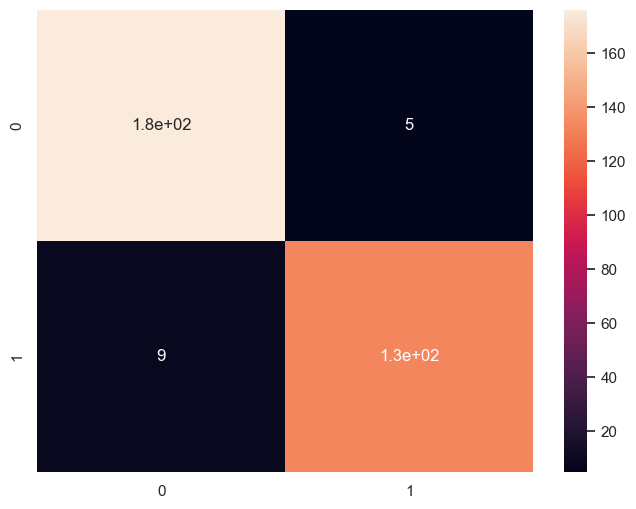

In [232]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)

In [233]:
print(classification_report(y_test,pred)) #it made between the  test data and the predicted values from the test 
#data of the data set

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       181
           1       0.96      0.94      0.95       142

    accuracy                           0.96       323
   macro avg       0.96      0.95      0.96       323
weighted avg       0.96      0.96      0.96       323



In [234]:
pickle.dump(BOW_obj,open('vectorizer.pkl','wb'))
            

In [235]:
pickle.dump(MNB,open('spamclassifier_MnB.pkl','wb'))


In [236]:
model=pickle.load(open('spamclassifier_MnB.pkl','rb'))


In [237]:
compare_dict={'actual':y_test,'pred':pred}
comparision_df=pd.DataFrame(compare_dict)
comparision_df.head(10)

,actual,pred
3180,0,0
517,1,1
3720,1,1
3398,0,0
3644,0,0
5535,0,0
937,0,0
3731,0,0
2363,0,0
1091,1,1
